# Related to Figure 5b

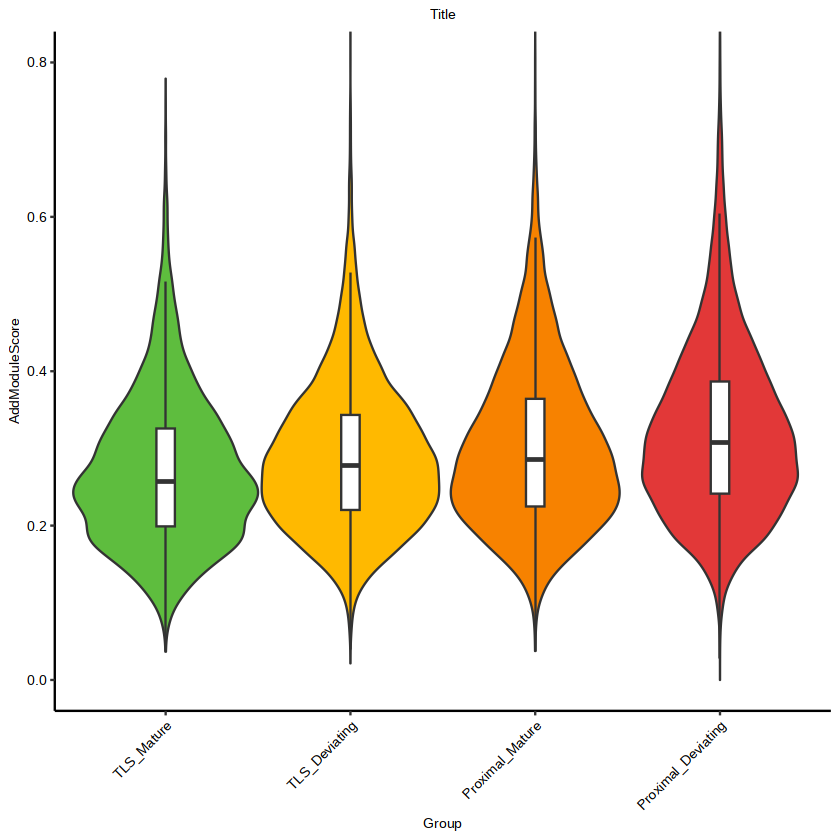

In [3]:

library(Seurat)
library(patchwork)
library(dplyr)
library(ggplot2)
library(glue)
library(dplyr)
library(ggplot2)
library(patchwork)
options(future.globals.maxSize = 30 * 1024^3)
library(stringr)
library(pheatmap)
library(RColorBrewer)
library(ggpubr)
library(viridis)

colors = c("#5ebd3e", "#ffb900", "#f78200", "#e23838", "#973999", "#009cdf")

df_plot1 = read.table('/data/yuchen_data/Stereo_seq/All_Figures/version2/Figure5/1.data/5b.data.txt', row.names=1, header=T, sep='\t')


df_plot1$KEGG_TRYPTOPHAN_METABOLISM = (df_plot1$KEGG_TRYPTOPHAN_METABOLISM - min(df_plot1$KEGG_TRYPTOPHAN_METABOLISM)) / (max(df_plot1$KEGG_TRYPTOPHAN_METABOLISM) - min(df_plot1$KEGG_TRYPTOPHAN_METABOLISM))



# 作比较的组
mylist <- list(c('Proximal_Deviating', 'Proximal_Mature'), c('TLS_Deviating', 'TLS_Mature'), c('Proximal_Mature', 'TLS_Deviating'))

plot_item = 'KEGG_TRYPTOPHAN_METABOLISM'
group_item = 'Group'

df_plot1$plot = df_plot1[[plot_item]]
df_plot1$groupby = df_plot1[[group_item]]

# 按中位数从高到低排序，看实际情况也可以不排序

group_order <- c('TLS_Mature', 'TLS_Deviating', 'Proximal_Mature', 'Proximal_Deviating')
df_plot1$groupby = factor(df_plot1$groupby, levels=group_order)

ggplot(df_plot1, aes(groupby,plot ,fill=groupby))+
    geom_violin(width=1)+
    coord_cartesian(ylim=c(0, 0.8)) + 
    scale_fill_manual(limits=group_order, values=colors[1:4])+ #颜色
    stat_compare_means(comparisons=mylist, label="p.format",method = 'wilcox.test', symnum.args=list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, 1),symbols = c("****", "***", "**", "*", "ns"))) +
    guides(fill=FALSE) +
    geom_boxplot(width=0.1, fill="white", outlier.alpha=0)+
    labs(title = 'Title',x = 'Group',y = 'AddModuleScore' ) +
    theme(
    plot.title    = element_text(color = 'black', size   = 8, hjust = 0.5),
    plot.subtitle = element_text(color = 'black', size   = 8,hjust = 0.5),
    plot.caption  = element_text(color = 'black', size   = 8,face = 'italic', hjust = 1),
    axis.text.x   = element_text(color = 'black', size = 8, angle = 45,hjust = 1),#
    axis.text.y   = element_text(color = 'black', size = 8, angle = 0),
    axis.title.x  = element_text(color = 'black', size = 8, angle = 0),
    axis.title.y  = element_text(color = 'black', size = 8, angle = 90),
    legend.title  = element_text(color = 'black', size  = 8),
    legend.text   = element_text(color = 'black', size   = 8),
    axis.line.y = element_line(color = 'black', linetype = 'solid'), # y轴线特征
    axis.line.x = element_line (color = 'black',linetype = 'solid'), # x轴线特征
    panel.background=element_rect(fill="white")
    )
